# 0118 FE Session


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
bureau = pd.read_csv('./chess.csv')
bureau.head()

,Unnamed: 0,Game ID,White Rating,Black Rating,Opening ECO,Opening Ply,White Centi-pawn Loss,White's Number of Inaccuracies,White's Number of Mistakes,White's Number of Blunders,Black Centi-pawn Loss,Black's Number of Inaccuracies,Black's Number of Mistakes,Black's Number of Blunders
0,0,J7Xvjkte,1441,1559,C20,4,32,2,2,0,87,2,4,1
1,1,SSzpi7W1,1258,1567,C46,6,43,0,0,1,6,0,0,0
2,2,NHpcYm3r,1697,1712,C68,7,11,1,0,0,42,1,0,2
3,3,Nrzmgzmn,1978,1868,D31,5,21,3,0,0,53,6,0,1
4,4,xMuFsnC6,2073,1816,A01,2,35,3,2,0,50,6,3,0


In [9]:
bureau.isnull().sum()/len(bureau)*100

Unnamed: 0                        0.0
Game ID                           0.0
White Rating                      0.0
Black Rating                      0.0
Opening ECO                       0.0
Opening Ply                       0.0
White Centi-pawn Loss             0.0
White's Number of Inaccuracies    0.0
White's Number of Mistakes        0.0
White's Number of Blunders        0.0
Black Centi-pawn Loss             0.0
Black's Number of Inaccuracies    0.0
Black's Number of Mistakes        0.0
Black's Number of Blunders        0.0
dtype: float64

In [12]:
bureau.drop(columns = ['Unnamed: 0', "Game ID"], inplace=True)

In [14]:
bureau.dtypes

White Rating                       int64
Black Rating                       int64
Opening ECO                       object
Opening Ply                        int64
White Centi-pawn Loss              int64
White's Number of Inaccuracies     int64
White's Number of Mistakes         int64
White's Number of Blunders         int64
Black Centi-pawn Loss              int64
Black's Number of Inaccuracies     int64
Black's Number of Mistakes         int64
Black's Number of Blunders         int64
dtype: object

In [17]:
bureau['Opening ECO'].nunique()

417

In [25]:
(bureau.groupby(['Opening ECO'])['Opening ECO'].count().sort_values(ascending = False) / len(bureau) * 100).head(15)

Opening ECO
D00    3.675484
A00    3.450126
C00    3.428663
B01    3.412566
B00    3.042335
C50    2.994044
A40    2.768686
C41    2.693567
B20    2.639910
A45    2.055052
D02    1.910179
B10    1.738477
C42    1.668724
C20    1.652626
C02    1.518485
Name: Opening ECO, dtype: float64

이들 중 2% 이상인것만 원핫 인코딩.

In [27]:
eco_type = ['D00', 'A00', 'C00', 'B01', 'B00', 'C50', 'A40', 'C41', 'B20']
for t in eco_type:
    bureau['eco_type' + '_' + t] = np.where(bureau['Opening ECO']==t, 1, 0)


In [29]:
bureau['eco_type_D00']

0        0
1        0
2        0
3        0
4        0
        ..
18632    0
18633    0
18634    0
18635    0
18636    0
Name: eco_type_D00, Length: 18637, dtype: int64

In [31]:
bureau

,White Rating,Black Rating,Opening ECO,Opening Ply,White Centi-pawn Loss,White's Number of Inaccuracies,White's Number of Mistakes,White's Number of Blunders,Black Centi-pawn Loss,Black's Number of Inaccuracies,...,Black's Number of Blunders,eco_type_D00,eco_type_A00,eco_type_C00,eco_type_B01,eco_type_B00,eco_type_C50,eco_type_A40,eco_type_C41,eco_type_B20
0,1441,1559,C20,4,32,2,2,0,87,2,...,1,0,0,0,0,0,0,0,0,0
1,1258,1567,C46,6,43,0,0,1,6,0,...,0,0,0,0,0,0,0,0,0,0
2,1697,1712,C68,7,11,1,0,0,42,1,...,2,0,0,0,0,0,0,0,0,0
3,1978,1868,D31,5,21,3,0,0,53,6,...,1,0,0,0,0,0,0,0,0,0
4,2073,1816,A01,2,35,3,2,0,50,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18632,884,1415,B00,2,56,5,1,2,94,4,...,3,0,0,0,0,1,0,0,0,0
18633,1187,845,B20,3,38,5,0,1,12,2,...,0,0,0,0,0,0,0,0,0,1
18634,1450,789,B21,3,64,9,4,4,36,7,...,2,0,0,0,0,0,0,0,0,0
18635,1959,1684,C15,7,14,1,0,0,34,6,...,1,0,0,0,0,0,0,0,0,0


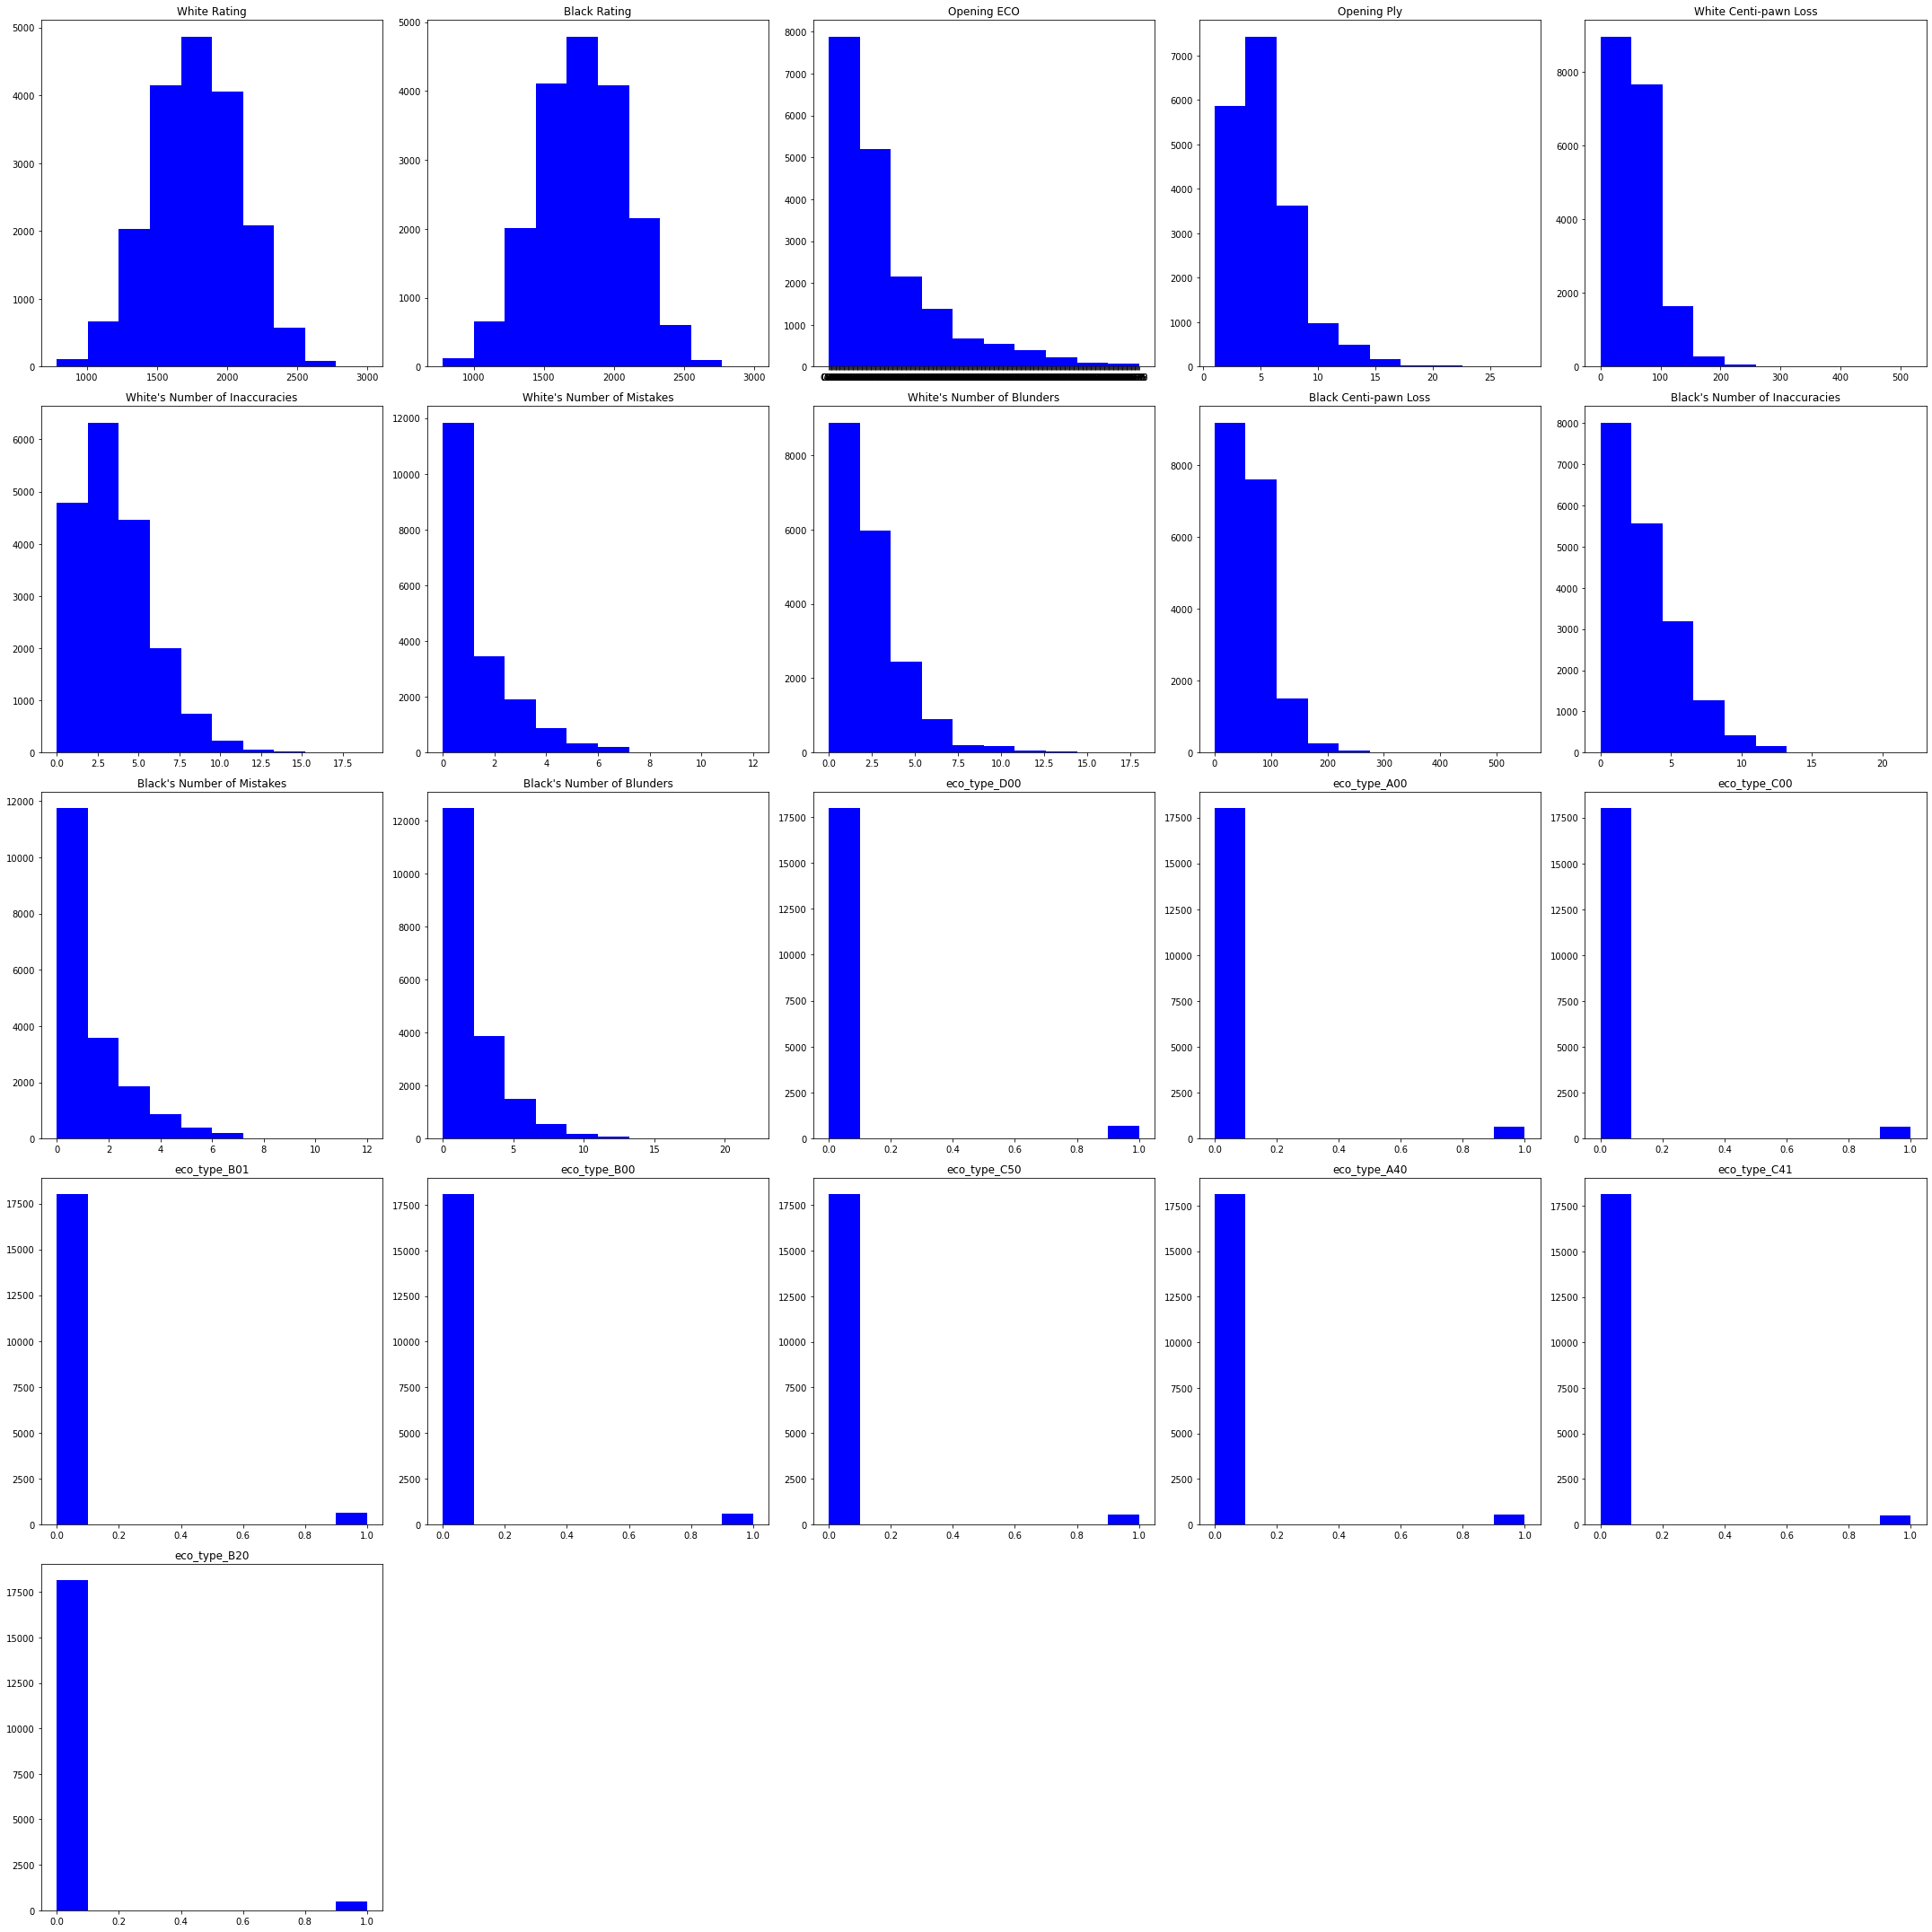

In [32]:
plt.figure(figsize = (30, 30))
for i, col in enumerate(bureau.columns.to_list()):
    plt.subplot(5, 5, i+1)
    plt.hist(bureau[col], label=col, color='blue')
    plt.title(col)
    plt.tight_layout()

<AxesSubplot:ylabel="White's Number of Mistakes">

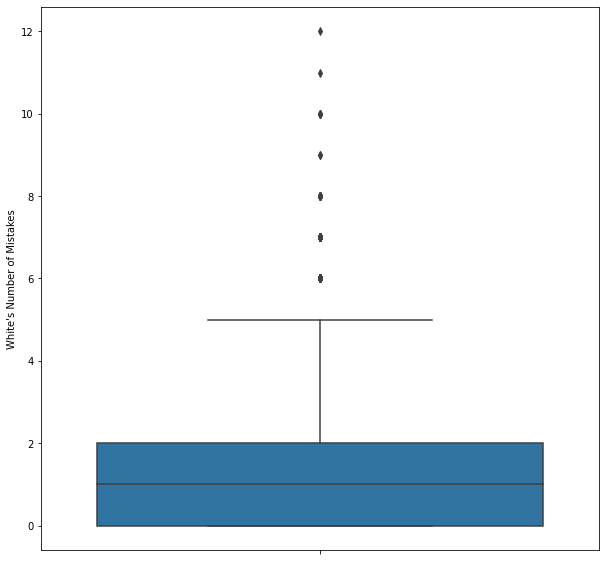

In [34]:
plt.figure(figsize=(10,10))
sns.boxplot(data = bureau, y = "White's Number of Mistakes")

In [35]:
q1 = bureau["White's Number of Mistakes"].quantile(0.25)
q2 = bureau["White's Number of Mistakes"].quantile(0.5)
q3 = bureau["White's Number of Mistakes"].quantile(0.75)
iqr = q3 - q1

<AxesSubplot:ylabel="White's Number of Mistakes">

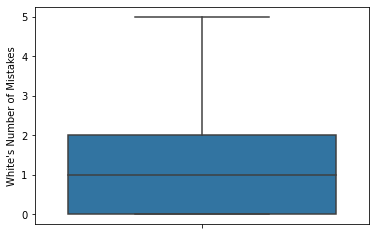

In [38]:
outliers = bureau["White's Number of Mistakes"] > (q3 + 1.5*iqr)
bureau.drop(bureau[outliers].index, inplace = True)
sns.boxplot(data = bureau, y = "White's Number of Mistakes")

<AxesSubplot:>

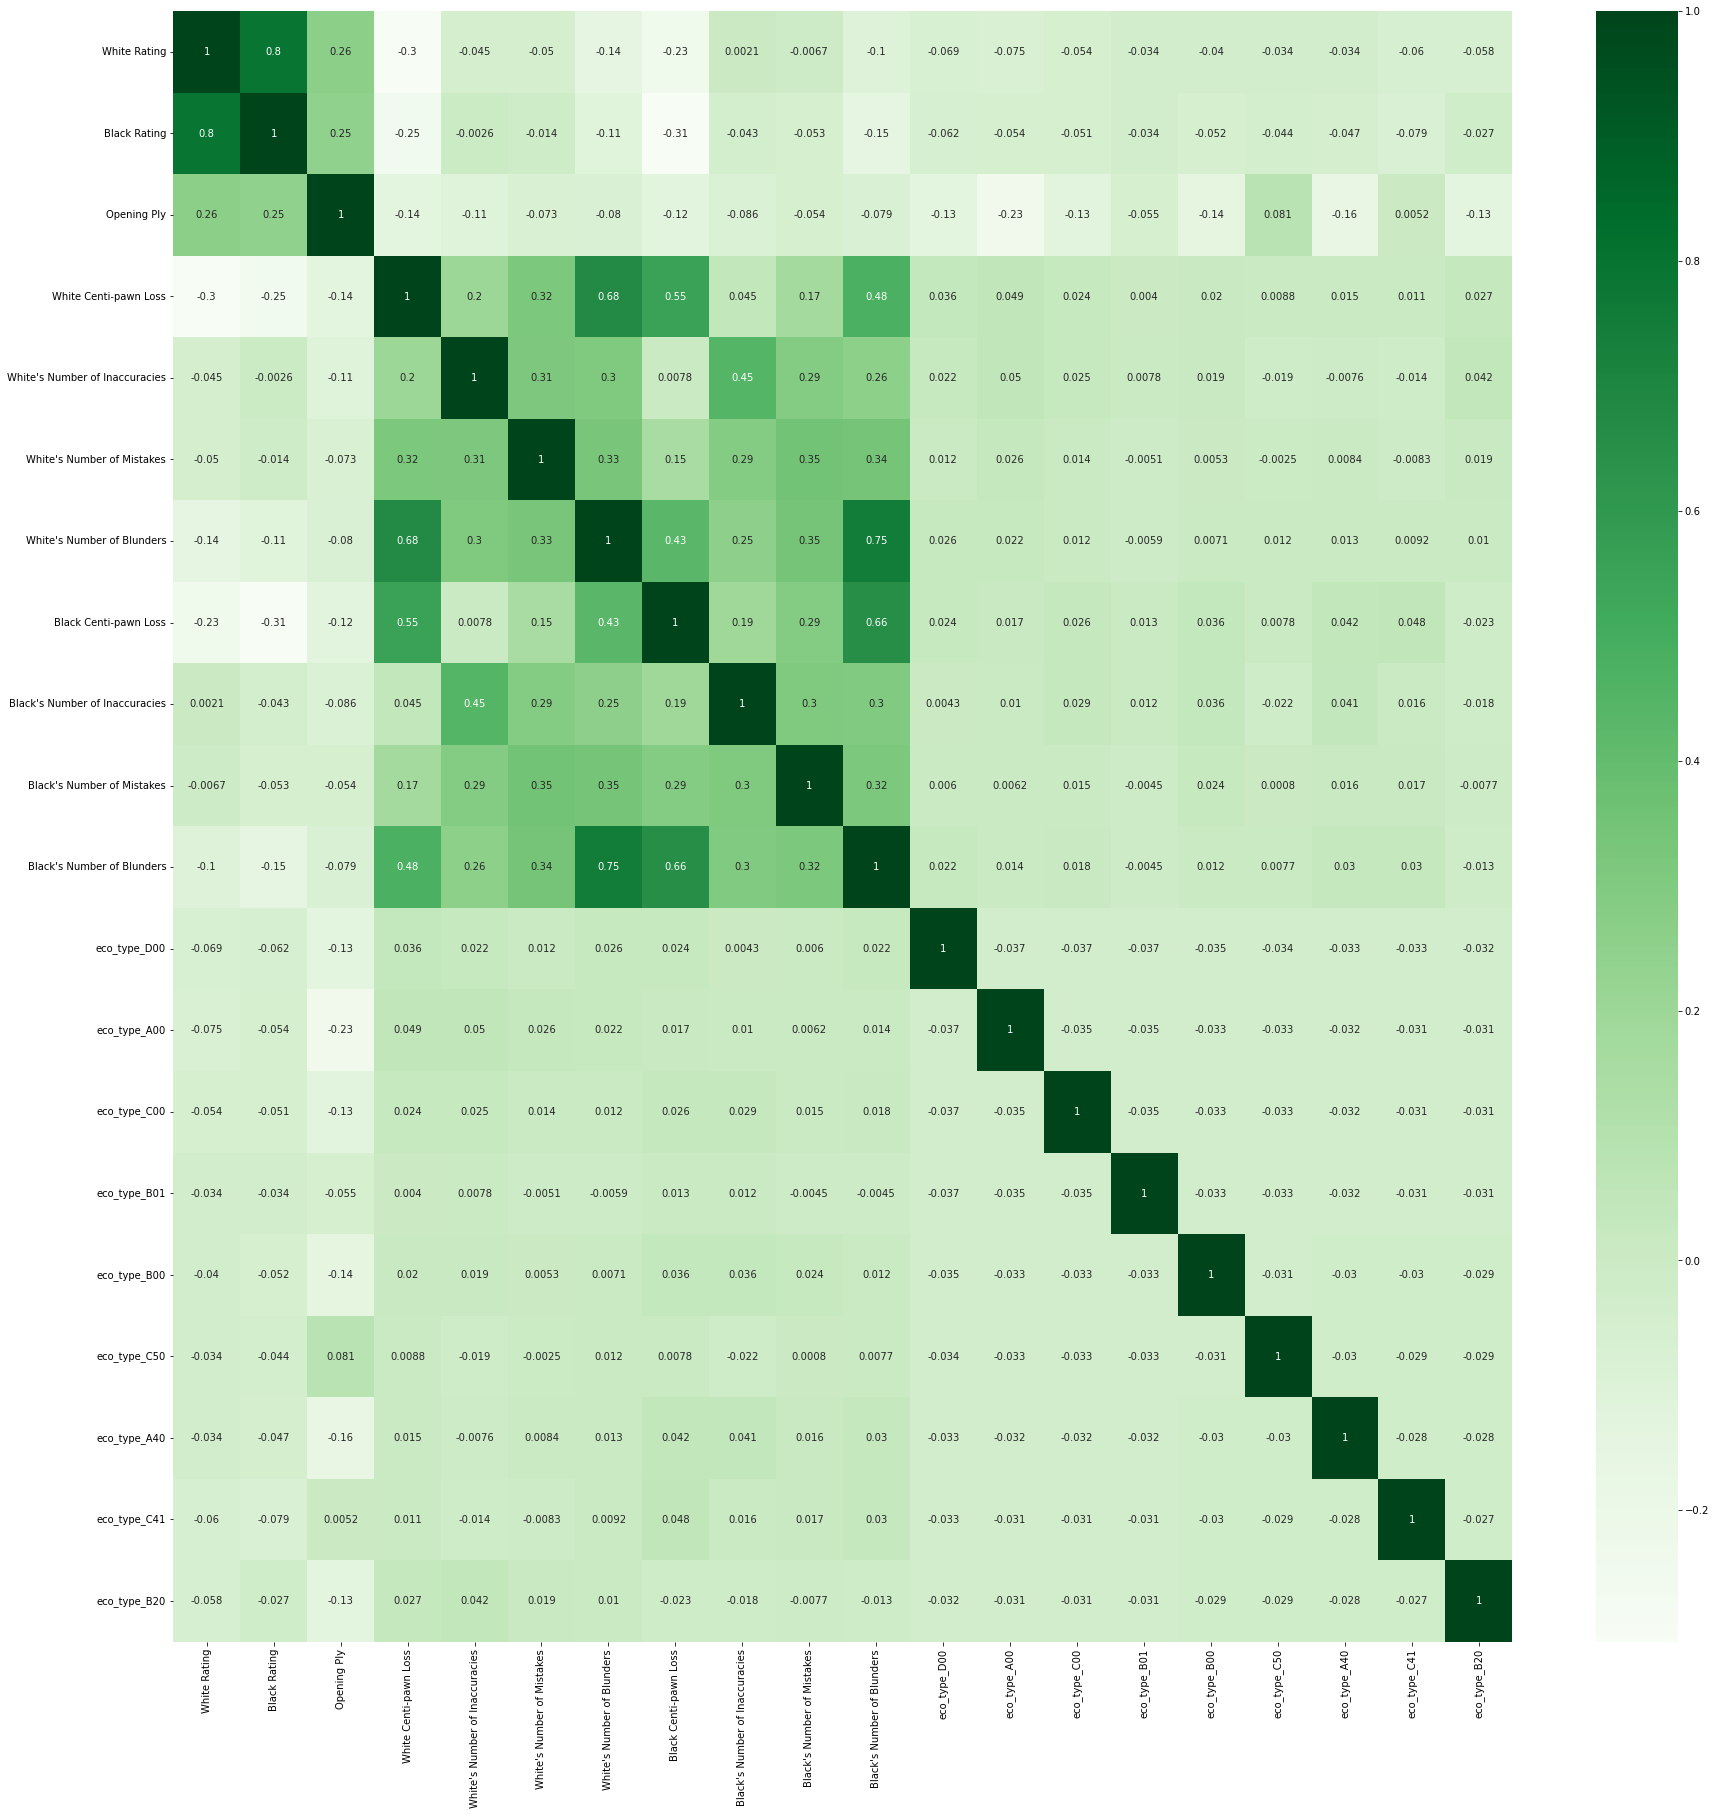

In [40]:
plt.figure(figsize=(30,30))
sns.heatmap(bureau.corr(), annot=True, cmap='Greens')